In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [17]:
df.shape

(3555, 18)

In [19]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.25,6313.0,3,3,2,2.0,Relatively New,1792.0,0,1,0,0,0,0,119
1,flat,paras dews,sector 106,1.17,6648.0,3,4,3+,12.0,Relatively New,1186.0,0,1,0,0,0,0,49
2,flat,shapoorji pallonji joyville gurugram,sector 102,2.40,10545.0,4,4,3+,15.0,Relatively New,1957.0,0,0,0,0,0,0,108
3,flat,tulip violet,sector 69,1.65,8871.0,3,3,2,1.0,Relatively New,1578.0,0,0,0,0,0,1,69
4,flat,satya the hermitage,sector 103,0.89,6138.0,2,3,3,1.0,Relatively New,1257.0,0,1,0,0,0,0,75


In [21]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [23]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 83,1.25,3,3,2,2.0,Relatively New,1792.0,0,1,0,0,0,0,119
1,flat,sector 106,1.17,3,4,3+,12.0,Relatively New,1186.0,0,1,0,0,0,0,49
2,flat,sector 102,2.40,4,4,3+,15.0,Relatively New,1957.0,0,0,0,0,0,0,108
3,flat,sector 69,1.65,3,3,2,1.0,Relatively New,1578.0,0,0,0,0,0,1,69
4,flat,sector 103,0.89,2,3,3,1.0,Relatively New,1257.0,0,1,0,0,0,0,75


# luxury score

<Axes: ylabel='luxury_score'>

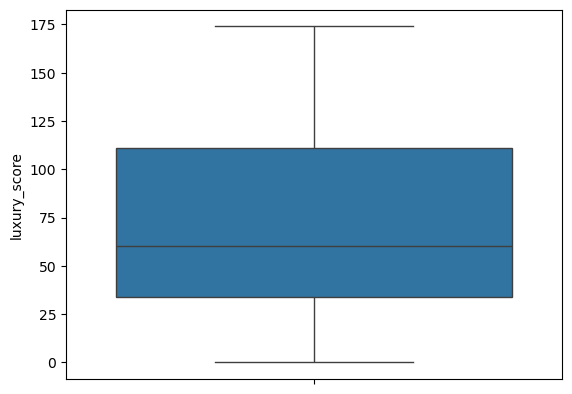

In [26]:
sns.boxplot(df['luxury_score'])

In [28]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins


In [30]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [32]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 83,1.25,3,3,2,2.0,Relatively New,1792.0,0,1,0,0,0,0,119,Medium
1,flat,sector 106,1.17,3,4,3+,12.0,Relatively New,1186.0,0,1,0,0,0,0,49,Low
2,flat,sector 102,2.40,4,4,3+,15.0,Relatively New,1957.0,0,0,0,0,0,0,108,Medium
3,flat,sector 69,1.65,3,3,2,1.0,Relatively New,1578.0,0,0,0,0,0,1,69,Medium
4,flat,sector 103,0.89,2,3,3,1.0,Relatively New,1257.0,0,1,0,0,0,0,75,Medium


# floorNum

<Axes: ylabel='floorNum'>

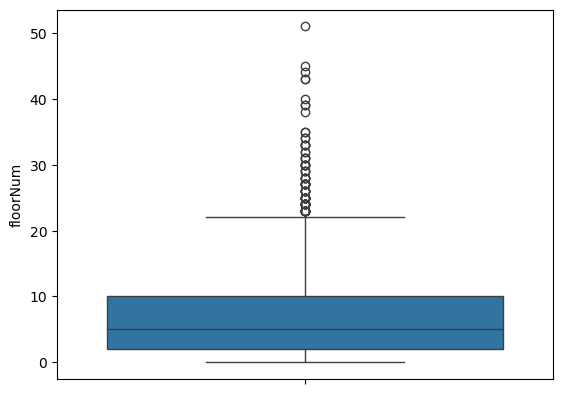

In [35]:
sns.boxplot(df['floorNum'])

In [37]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins


In [39]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [41]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 83,1.25,3,3,2,2.0,Relatively New,1792.0,0,1,0,0,0,0,119,Medium,Low Floor
1,flat,sector 106,1.17,3,4,3+,12.0,Relatively New,1186.0,0,1,0,0,0,0,49,Low,High Floor
2,flat,sector 102,2.40,4,4,3+,15.0,Relatively New,1957.0,0,0,0,0,0,0,108,Medium,High Floor
3,flat,sector 69,1.65,3,3,2,1.0,Relatively New,1578.0,0,0,0,0,0,1,69,Medium,Low Floor
4,flat,sector 103,0.89,2,3,3,1.0,Relatively New,1257.0,0,1,0,0,0,0,75,Medium,Low Floor


In [43]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [45]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 83,1.25,3,3,2,Relatively New,1792.0,0,1,0,0,0,0,Medium,Low Floor
1,flat,sector 106,1.17,3,4,3+,Relatively New,1186.0,0,1,0,0,0,0,Low,High Floor
2,flat,sector 102,2.40,4,4,3+,Relatively New,1957.0,0,0,0,0,0,0,Medium,High Floor
3,flat,sector 69,1.65,3,3,2,Relatively New,1578.0,0,0,0,0,0,1,Medium,Low Floor
4,flat,sector 103,0.89,2,3,3,Relatively New,1257.0,0,1,0,0,0,0,Medium,Low Floor


In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [49]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,97.0,3,3,2.0,3.0,1792.0,0,1,0,0,0,0,2.0,1.0
1,0.0,10.0,3,4,4.0,3.0,1186.0,0,1,0,0,0,0,1.0,0.0
2,0.0,6.0,4,4,4.0,3.0,1957.0,0,0,0,0,0,0,2.0,0.0
3,0.0,80.0,3,3,2.0,3.0,1578.0,0,0,0,0,0,1,2.0,1.0
4,0.0,7.0,2,3,3.0,3.0,1257.0,0,1,0,0,0,0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.0,59.0,3,3,4.0,0.0,1950.0,0,0,0,0,0,1,0.0,2.0
3551,0.0,40.0,2,2,2.0,2.0,1200.0,0,0,0,0,0,0,1.0,1.0
3552,0.0,105.0,2,2,3.0,3.0,1225.0,1,0,0,0,0,1,1.0,0.0
3553,0.0,46.0,2,2,3.0,1.0,625.0,0,0,0,0,0,0,1.0,1.0


In [51]:
y_label

0       1.25
1       1.17
2       2.40
3       1.65
4       0.89
        ... 
3550    2.35
3551    1.25
3552    0.65
3553    0.65
3554    1.80
Name: price, Length: 3555, dtype: float64

# Technique 1 - Correlation Analysis

<Axes: >

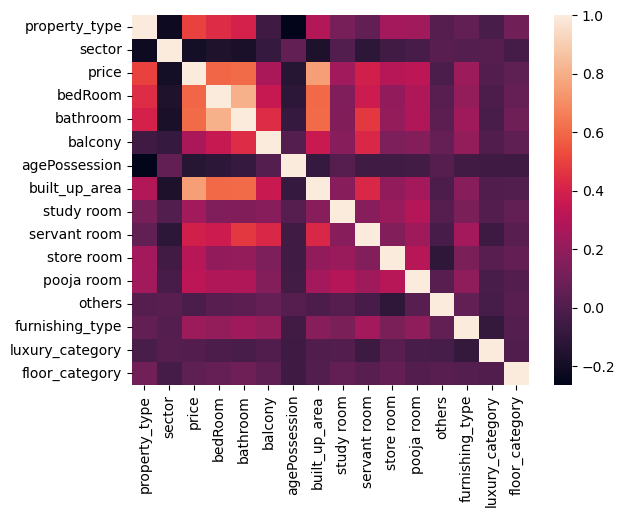

In [54]:
sns.heatmap(data_label_encoded.corr())

In [56]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.198613
1,price,1.000000
2,bedRoom,0.591281
3,bathroom,0.609780
4,balcony,0.269693
5,agePossession,-0.133601
6,built_up_area,0.748584
7,study room,0.243000
8,servant room,0.391982
9,store room,0.305703


# Technique 2 - Random Forest Feature Importance

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651934
1,sector,0.103684
0,property_type,0.098961
2,bedRoom,0.023981
3,bathroom,0.023736
8,servant room,0.019556
5,agePossession,0.014530
4,balcony,0.012188
7,study room,0.010552
12,furnishing_type,0.009999


# Technique 3 - Gradient Boosting Feature importances

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.680544
1,sector,0.101934
0,property_type,0.097013
2,bedRoom,0.036896
3,bathroom,0.036419
8,servant room,0.022681
9,store room,0.011229
5,agePossession,0.004155
12,furnishing_type,0.003429
7,study room,0.002675


# Technique 4 - Permutation Importance

In [65]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.769748
0,property_type,0.203334
1,sector,0.147163
8,servant room,0.015947
3,bathroom,0.014471
2,bedRoom,0.014088
5,agePossession,0.007055
13,luxury_category,0.005142
7,study room,0.002681
9,store room,0.002163


# Technique 5 - LASSO

In [68]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510743
0,property_type,0.717279
3,bathroom,0.276183
9,store room,0.199618
7,study room,0.171208
12,furnishing_type,0.165615
8,servant room,0.161957
10,pooja room,0.072721
13,luxury_category,0.055622
2,bedRoom,0.013825


# Technique 6 - RFE

In [71]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.650027
1,sector,0.103223
0,property_type,0.101111
2,bedRoom,0.029052
3,bathroom,0.023000
8,servant room,0.018804
5,agePossession,0.013878
4,balcony,0.012652
12,furnishing_type,0.010239
7,study room,0.009286


# Technique 7 - Linear Regression Weights

In [76]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.513216
0,property_type,0.717261
3,bathroom,0.282866
9,store room,0.204101
7,study room,0.179231
12,furnishing_type,0.174949
8,servant room,0.171183
10,pooja room,0.075712
13,luxury_category,0.067093
2,bedRoom,0.016564


In [78]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [80]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.198613,0.103684,0.101934,0.147163,-0.054002,0.103223,-0.063131
bedRoom,0.591281,0.023981,0.036896,0.014088,0.013825,0.029052,0.016564
bathroom,0.609780,0.023736,0.036419,0.014471,0.276183,0.023000,0.282866
balcony,0.269693,0.012188,0.001647,-0.001426,-0.042508,0.012652,-0.065260
agePossession,-0.133601,0.014530,0.004155,0.007055,-0.000000,0.013878,0.001131
built_up_area,0.748584,0.651934,0.680544,0.769748,1.510743,0.650027,1.513216
study room,0.243000,0.010552,0.002675,0.002681,0.171208,0.009286,0.179231
servant room,0.391982,0.019556,0.022681,0.015947,0.161957,0.018804,0.171183
store room,0.305703,0.008897,0.011229,0.002163,0.199618,0.007466,0.204101


In [82]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [86]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.747797
sector             0.123497
bedRoom            0.028567
bathroom           0.026782
servant room       0.021031
agePossession      0.010854
store room         0.008209
balcony            0.006990
study room         0.006940
furnishing_type    0.006345
luxury_category    0.005488
floor_category     0.003426
pooja room         0.002249
others             0.001824
dtype: float64

In [88]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,97.0,3,3,2.0,3.0,1792.0,0,1,0,0,0,0,2.0,1.0
1,0.0,10.0,3,4,4.0,3.0,1186.0,0,1,0,0,0,0,1.0,0.0
2,0.0,6.0,4,4,4.0,3.0,1957.0,0,0,0,0,0,0,2.0,0.0
3,0.0,80.0,3,3,2.0,3.0,1578.0,0,0,0,0,0,1,2.0,1.0
4,0.0,7.0,2,3,3.0,3.0,1257.0,0,1,0,0,0,0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.0,59.0,3,3,4.0,0.0,1950.0,0,0,0,0,0,1,0.0,2.0
3551,0.0,40.0,2,2,2.0,2.0,1200.0,0,0,0,0,0,0,1.0,1.0
3552,0.0,105.0,2,2,3.0,3.0,1225.0,1,0,0,0,0,1,1.0,0.0
3553,0.0,46.0,2,2,3.0,1.0,625.0,0,0,0,0,0,0,1.0,1.0


In [90]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [92]:
scores.mean()

0.8142183056842696

In [96]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [98]:
scores.mean()

0.8141651931840738

In [100]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [102]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)